In [1]:
# Importing necessary libraries
import pandas as pd

In [2]:
#loading the data
data=pd.read_csv("train.csv")

In [3]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
data.shape

(8523, 12)

In [5]:
#finding the Missing Values(Null Values) 
datawith_missing = data.isnull().sum()
print(datawith_missing)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [6]:
#Fill missing Item_Weight values by grouping by Item_Type and using the median of each group
data['Item_Weight']=data['Item_Weight'].fillna(data.groupby('Item_Type')['Item_Weight'].transform('median'))

In [7]:
#Fill missing Outlet_Size values by grouping by Item_Type and using the mode of each group
data['Outlet_Size'] = data['Outlet_Size'].fillna(data.groupby('Item_Type')['Outlet_Size'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [8]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [9]:
#Check if there are still missing values in the data
data_without = data.isnull().sum()

In [10]:
print(data_without)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [11]:
#finding the unique attributes of Outlet_Size
print(data["Outlet_Size"].unique())

['Medium' 'High' 'Small']


In [12]:
#finding the unique attributes of Outlet_Location_Type
print(data["Outlet_Location_Type"].unique())

['Tier 1' 'Tier 3' 'Tier 2']


In [13]:
#finding the count of unique attributes of Item_Fat_Content 
data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
import matplotlib.pyplot as plt

### 1 Distribution of Sales by Item Type using Bar Graph

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Fruits and Vegetables'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Frozen Foods'),
  Text(4, 0, 'Dairy'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Baking Goods'),
  Text(7, 0, 'Health and Hygiene'),
  Text(8, 0, 'Meat'),
  Text(9, 0, 'Soft Drinks'),
  Text(10, 0, 'Breads'),
  Text(11, 0, 'Hard Drinks'),
  Text(12, 0, 'Starchy Foods'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Breakfast'),
  Text(15, 0, 'Seafood')])

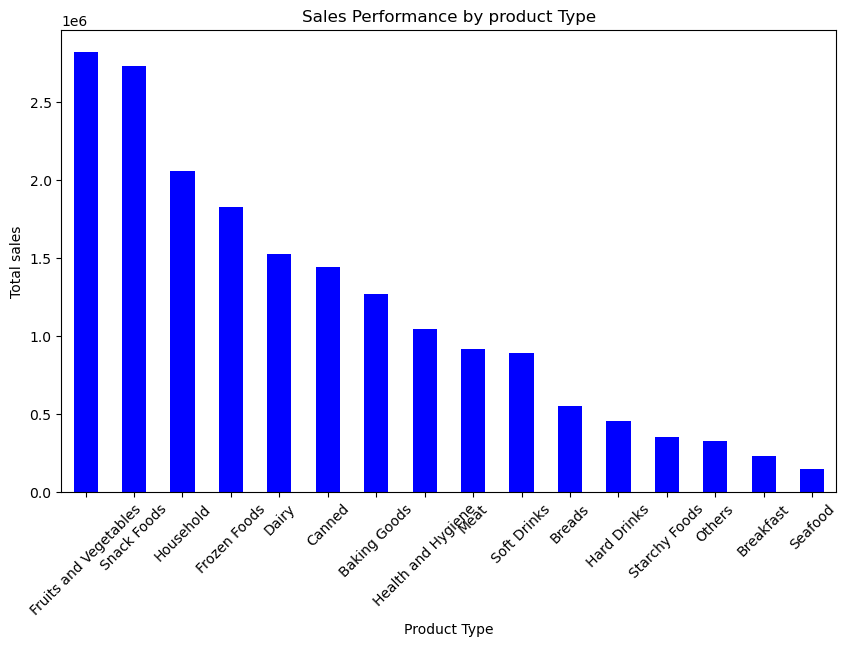

In [15]:
product_sales=data.groupby("Item_Type")["Item_Outlet_Sales"].sum().sort_values(ascending=False)
#create a bar plot to visualize the sales performance of diff product types
plt.figure(figsize=(10,6))
product_sales.plot(kind="bar",color="blue")
plt.title("Sales Performance by product Type")
plt.xlabel("Product Type")
plt.ylabel("Total sales")
plt.xticks(rotation=45)

The Outlet with the highest Sales in the dataset is *Fruits and Vegitables*

### 2.Sales Performance by Outlet Establishment Year using Line graph

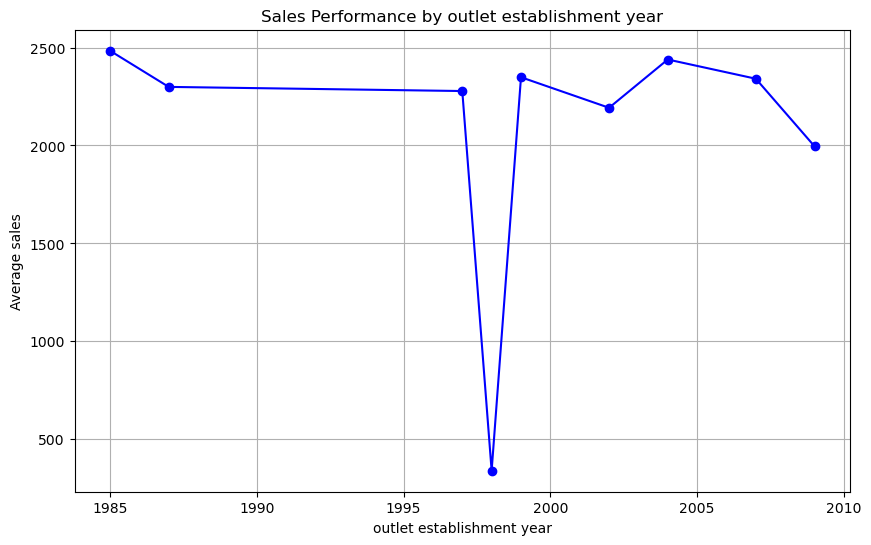

In [16]:
sales_by_yr=data.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].mean().sort_index()

#create a line plot to visualize the sales performance by outlet establishment year
plt.figure(figsize=(10,6))
sales_by_yr.plot(marker='o', color='b')

#labeling the graph
plt.title("Sales Performance by outlet establishment year")
plt.xlabel("outlet establishment year")
plt.ylabel("Average sales")
plt.grid()

The Year 1985 has the highest sales in dataset

### 4.Effect of Outlet Size on Sales using Bar plot

(array([0, 1, 2]),
 [Text(0, 0, 'Small'), Text(1, 0, 'Medium'), Text(2, 0, 'High')])

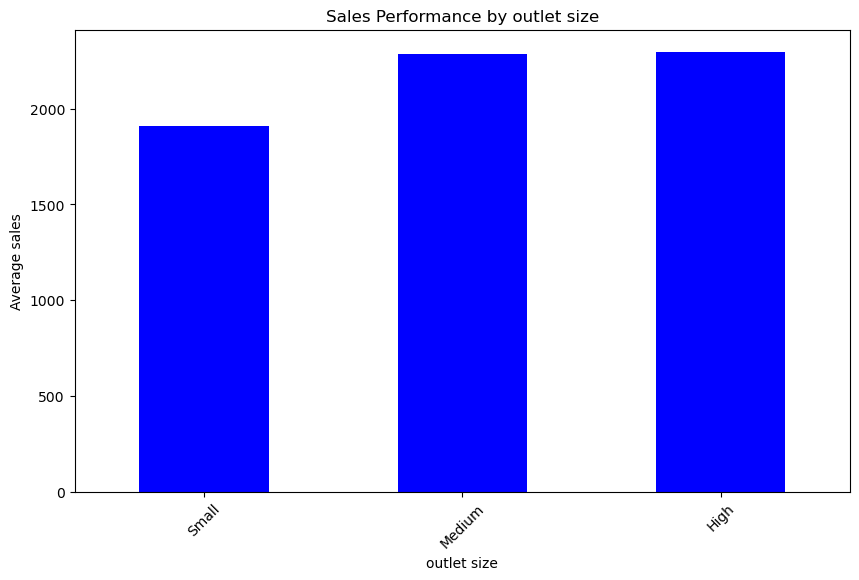

In [17]:
sales_by_size=data.groupby("Outlet_Size")["Item_Outlet_Sales"].mean().sort_values()

#create a bar plot to visualize the sales performance by outlet size
plt.figure(figsize=(10,6))
sales_by_size.plot(kind="bar",color="blue")

#labeling the graph
plt.title("Sales Performance by outlet size")
plt.xlabel("outlet size")
plt.ylabel("Average sales")
plt.xticks(rotation=45)

### 3. Sales Distribution Across Outlet Types using Box plot

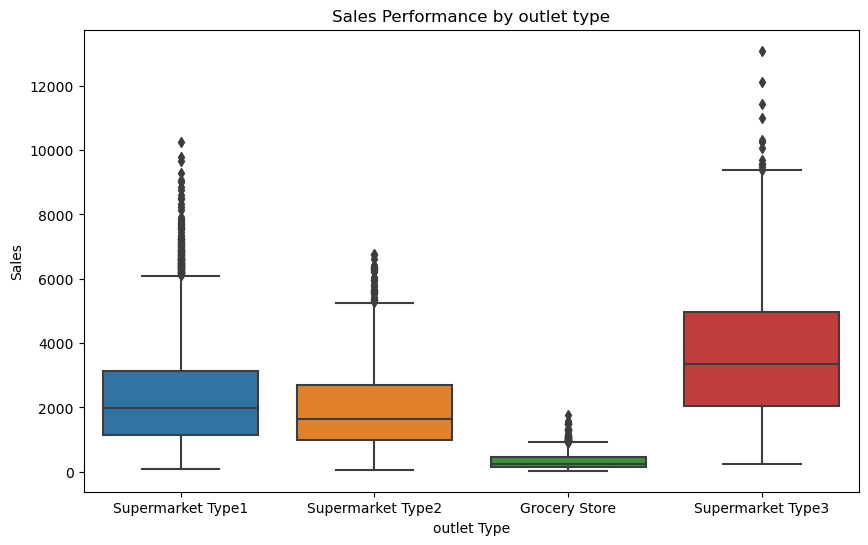

In [18]:
import seaborn as sns
plt.figure(figsize=(10,6))

# Create a box plot
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data)

#labeling the graph
plt.title("Sales Performance by outlet type")
plt.xlabel("outlet Type")
plt.ylabel("Sales")
plt.show()

### 5.Relationship b\w item MRP and Sales by Scatter Plot

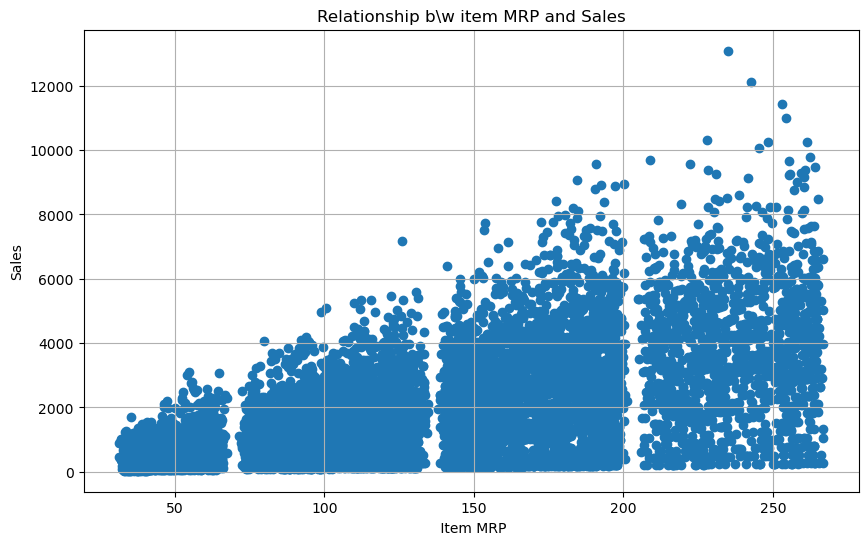

In [19]:
#create a scatter plot to visualize the sales performance by item_MRP
plt.figure(figsize=(10,6))
plt.scatter(data.Item_MRP,data.Item_Outlet_Sales)

#labeling the graph
plt.title("Relationship b\w item MRP and Sales")
plt.xlabel(" Item MRP")
plt.ylabel("Sales")
plt.grid()

### 6.Sales Distribution Across Outlet Location Type using Box plot

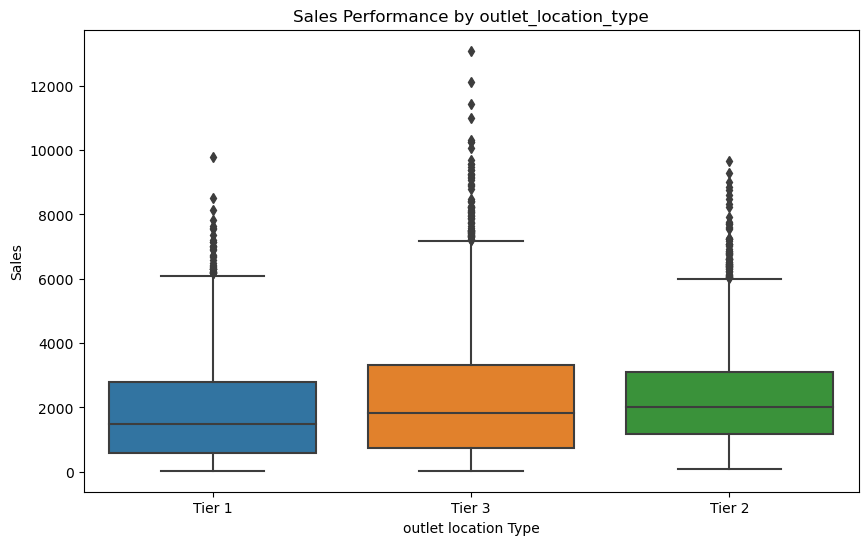

In [20]:
#create a box plot to visualize the sales performance by outlet location Type
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data)

#labeling the graph
plt.title("Sales Performance by outlet_location_type")
plt.xlabel("outlet location Type")
plt.ylabel("Sales")
plt.show()

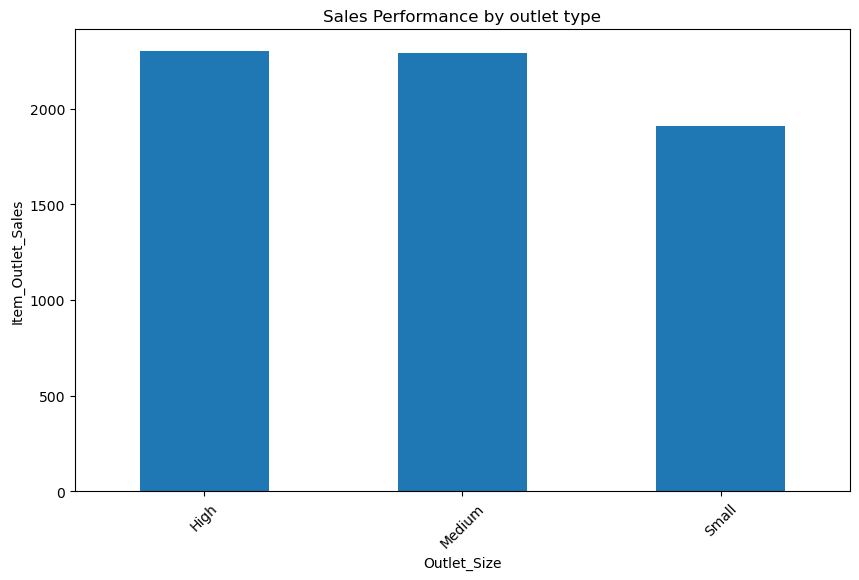

In [21]:
mrp_yr=data.groupby("Outlet_Size")["Item_Outlet_Sales"].mean()
plt.figure(figsize=(10,6))

# Create a plot
mrp_yr.plot(kind="bar")

#labeling the graph
plt.title("Sales Performance by outlet type")
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.xticks(rotation=45)
plt.show()

In [22]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [23]:
print(data["Item_Visibility"].isnull().value_counts())

False    8523
Name: Item_Visibility, dtype: int64


In [24]:
data.shape

(8523, 12)

In [25]:
print(data.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


### Identify Nominal and Ordinal Data

In [26]:
# Assuming nominal and ordinal data columns
nominal_cols = ['Item_Type','Outlet_Identifier', 'Item_Fat_Content','Outlet_Location_Type','Outlet_Type','Item_Identifier','Item_Type']  # Categorical without order
ordinal_cols = ['Outlet_Size']  # Categorical with order, e.g., Small < Medium < High
# Numerical columns
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
                    'Item_Outlet_Sales', 'Outlet_Establishment_Year']  

# Display identified nominal and ordinal and numerical columns
print("\nNominal Columns:", nominal_cols)
print("Ordinal Columns:", ordinal_cols)
print("Numerical Columns:", numerical_columns)


Nominal Columns: ['Item_Type', 'Outlet_Identifier', 'Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Identifier', 'Item_Type']
Ordinal Columns: ['Outlet_Size']
Numerical Columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Establishment_Year']


### Encoding Techniques
#### One-Hot Encoding(Nominal data)

In [28]:
#creating binary columns for each category.
data_encoded = pd.get_dummies(data, columns=['Item_Type','Outlet_Identifier', 'Item_Fat_Content','Outlet_Location_Type','Outlet_Type','Item_Identifier','Item_Type'])

In [29]:
data_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,1999,Medium,3735.1380,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,2009,Medium,443.4228,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,Medium,2097.2700,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,1998,Medium,732.3800,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,High,994.7052,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
data.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

### Ordinal Encoding(categorical data)

In [31]:
product_quality_maping={'Low' : 1,'Medium':2,'High':3}
data_encoded['Outlet_Size'] = data_encoded['Outlet_Size'].map(product_quality_maping)
print(data_encoded['Outlet_Size'].head())

0    2.0
1    2.0
2    2.0
3    2.0
4    3.0
Name: Outlet_Size, dtype: float64


In [32]:
data_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,1999,2.0,3735.1380,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,2009,2.0,443.4228,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,2.0,2097.2700,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,1998,2.0,732.3800,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,3.0,994.7052,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
